In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import json

In [2]:
from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=13.0)
rc('text', usetex=False)
rc('figure', figsize=(11.69,8.27))

from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(14.0)
panel_label_font.set_family("sans-serif")

# Seaborn styles
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("data/paperbuzz_metrics.csv", na_values=0)
df.set_index("id", inplace=True)
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

df = df[~df.date.isnull()]
df.fillna(0, inplace=True)
df['doi_prefix'] = df.doi.map(lambda x: x[:x.find('/')])

/usr/local/Cellar/ipython/7.4.0/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df[['twitter', 'wikipedia', 'hypothesis']].describe()

,twitter,wikipedia,hypothesis
count,1.112735e+06,1.112735e+06,1.112735e+06
mean,5.947238e-02,9.215851e-02,3.055534e-05
std,1.544913e+00,3.658541e+00,2.698029e-02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,6.070000e+02,1.263000e+03,2.800000e+01


In [6]:
def coverage(x): 
    return len(x[x>0]) / len(x)

data = pd.DataFrame(df[df.date.between('2017-01-01', '2017-12-31')] \
                    .groupby('doi_prefix').agg(['count', 'mean', coverage]))

# Keep only those that have at least 5 articles in 2017
data = data[data['n_authors']['count'] >= 5]

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

data[['twitter', 'wikipedia']].describe()

twitter                   wikipedia                  
         count     mean coverage     count     mean coverage
count 1,158.00 1,158.00 1,158.00  1,158.00 1,158.00 1,158.00
mean    123.13     0.19     0.04    123.13     0.11     0.00
std     345.45     1.39     0.11    345.45     1.78     0.03
min       5.00     0.00     0.00      5.00     0.00     0.00
25%      20.25     0.00     0.00     20.25     0.00     0.00
50%      42.00     0.00     0.00     42.00     0.00     0.00
75%     101.00     0.03     0.02    101.00     0.00     0.00
max   8,793.00    38.50     1.00  8,793.00    59.30     0.82

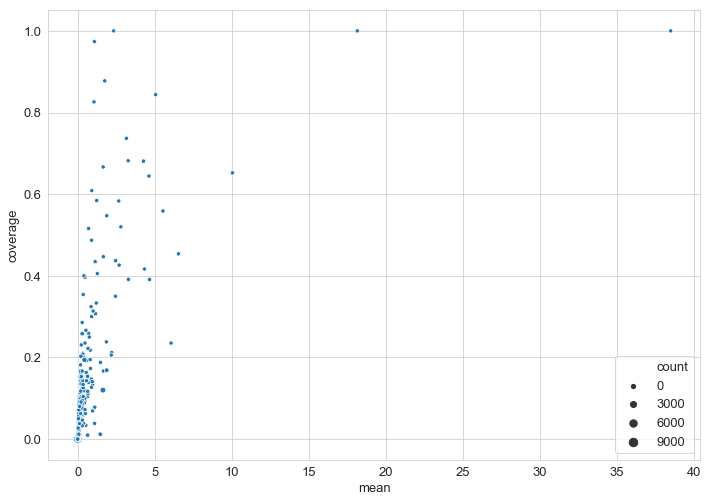

In [10]:
metric = 'twitter'
sns.scatterplot(x='mean', y='coverage', size='count', data=data[metric])

In [11]:
for metric in ['twitter', 'wikipedia', 'crossref', 'hypothesis']:
    sns.scatterplot(x='mean', y='coverage', size='count', data=data[metric])
    plt.savefig('%s_2017.png' % metric)
    plt.clf()
# plt.xlim([0,50])

<Figure size 841.68x595.44 with 0 Axes>

In [79]:
df2 = data['twitter']
len(df2[df2['coverage'] == 0])/len(df2)

0.657167530224525